### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

--答案写这里--
自变量：
一列文字，文字有两种性质，分别为一致文字条件和不一致文字条件

因变量：
测试者在同等大小的列表中的说出墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

零假设：
在显著水平为0.05的情况下，不一致文字条件下会对受试完成时间测试产生影响。
备用假设：
在显著水平为0.05的情况下，不一致文字条件下会不对受试完成测试时间产生影响
设一致文字条件下的说出墨色名称总体均值为T_con,不一致文字条件下的说出墨色名称总体均值为T_incon。

H0:T_con=T_incon

Ha:T_con=T_incon

实验中的样本为相依样本,是对一组项目进行的配对测量.因为相依样本，可以直接假设方差相等。样本也符合正态分布(由下图观察可知)，满足t检验前提。
双样本T 检验是用于一个或两个正态分布总体的均值的假设检验。
对于不同的情形存在多种类型的 t 检验，但是这些检验均使用一个在原假设下服从 t 分布的检验统计量.检验相关或配对观测值之差的均值是否等于目标值因为配对T检验。
两样本来源同一总体，两种样本代表同一组人在实验条件不同的情况下（文字一致和文字非一致）完成单组测试所花的识别时间,属于对比实验， 样本个体之间相互独立,且样本数据量小于三十，因此本次项目应该选用双尾配对T检验。

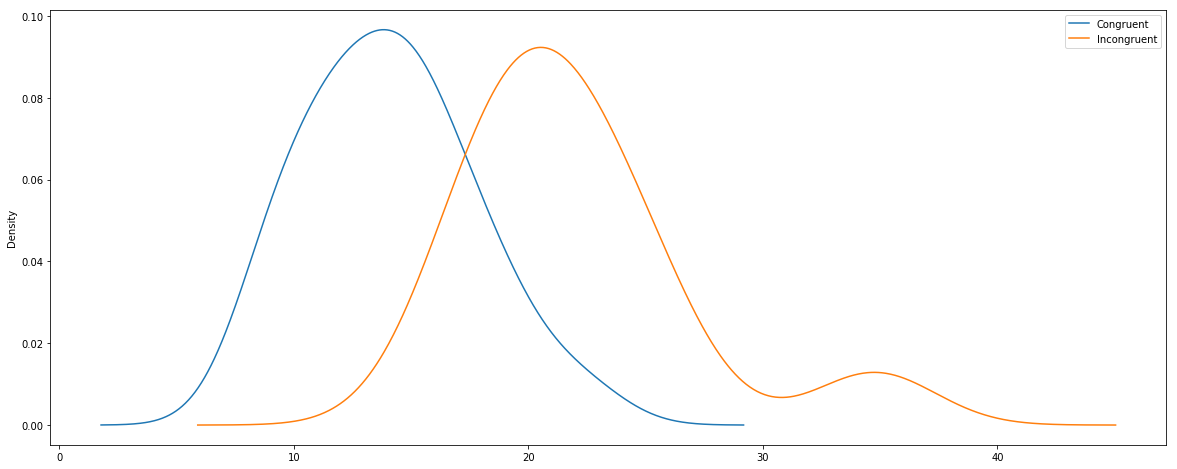

In [14]:
%matplotlib inline
data.plot(kind='density',figsize=(20,8))

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

首先，我们导入数据，先观察一下数据的组成，数据的格式，数据缺失情况。我们可以看到数据竟然是那么完美，谢天谢地。

In [2]:
# 在这里执行你的分析
import pandas as pd
data=pd.read_csv("stroopdata.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
# 平均值
data.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [5]:
#方差
data.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

--答案写这里--
集中趋势测:平均值
从平均值来看，在文字墨色一致条件下，平均反应时间要比文字墨色不一致的，短许多。
变异测量：方差,标准差,从上可以发现文字墨色不一致的方差和标准差要更大一些，说明文字墨色不一致的样本间差距大一些。


明显，在“Incongruent”中，值35为异常值

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

从图中，我们可以观察到两样本符合正态分布规律，且非一致文本应答平均时间要高于一致文本平均应答时间。

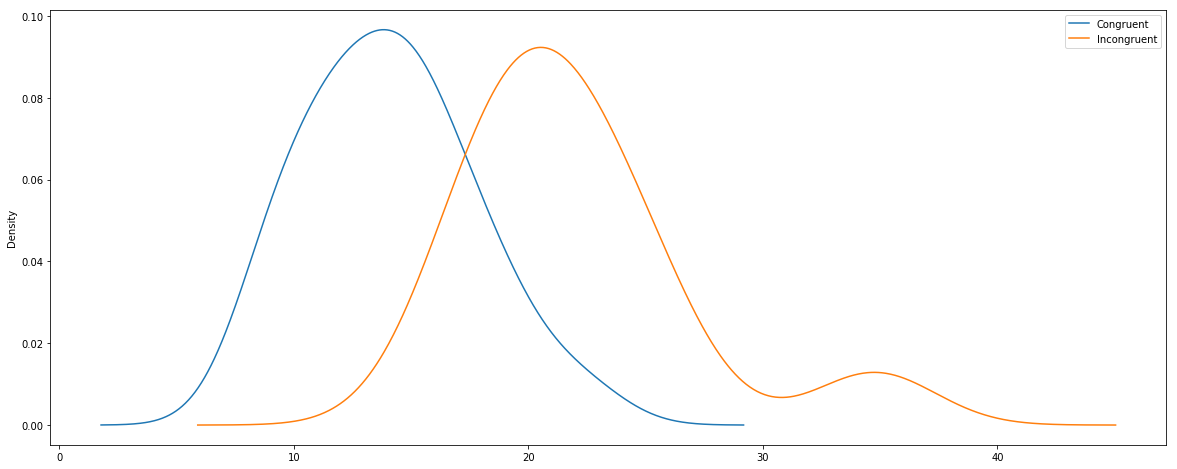

In [6]:
# 在这里创建可视化图表

data.plot(kind='density',figsize=(20,8))

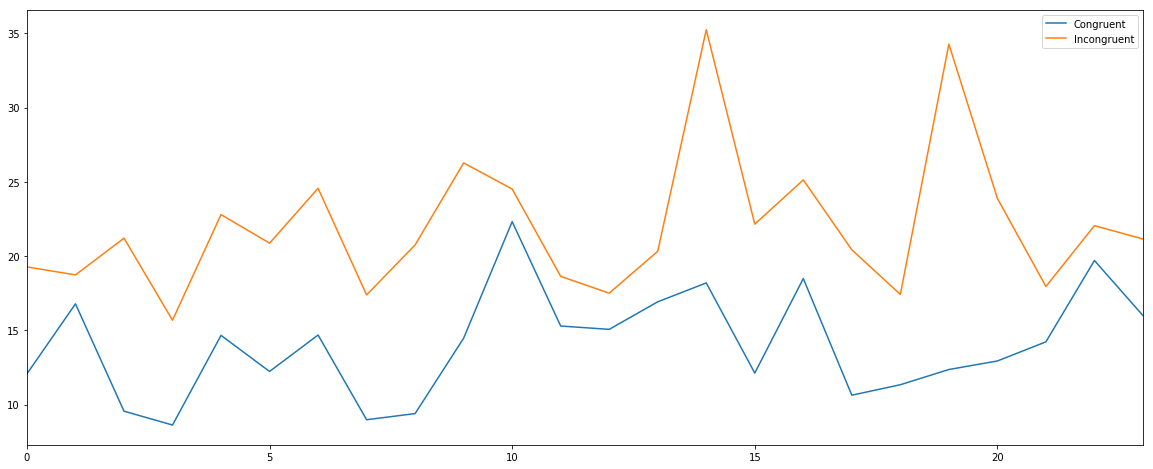

In [7]:
data.plot(kind='line',figsize=(20,8))

In [8]:
# 查看置信区间
import scipy
Congruent_CI = scipy.stats.norm.interval(0.95, loc=data['Congruent'].mean(), scale=data['Congruent'].std())
Incongruent_CI = scipy.stats.norm.interval(0.95, loc=data['Incongruent'].mean(), scale=data['Incongruent'].std())
Congruent_CI,Incongruent_CI

((7.0749115949293726, 21.027338405070626),
 (12.613857474845808, 31.417975858487523))

--答案写这里--

从第一张图,样本数目总体趋向正态分布，文字墨色条件一致情况下受试者所用时间分布更窄，均值和方差都更小，而文字墨色不一致情况下受试者所用时间分布更广，最小值都比文字条件一致情况的中值和均值要大，可以猜测文字条件不一致会对测试者使用时间造成较大影响

从第二张图来看，每个受试者，在文字墨色不一致的情况下完成测试的时间都要比在文字墨色一致情况下完成测试的时间要短。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [12]:
###  数据维度
degree=data.Incongruent.count()-1
degree

23

In [16]:
from scipy import stats
stats.ttest_rel(data['Congruent'],data['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [17]:
#双尾T检验，p值/2
pvalue = 4.1030005857111781e-08 / 2
pvalue

2.051500292855589e-08

In [18]:
#t-critical value: alpha/2 = 0.025, df = 23
critical = 1.714 
critical

1.714

--答案写这里--

α为5%，自由度为23,单尾t检验的临界值在1.714（查表得）,下方的p/2值有显著小于α/2（0.025）

关键t统计值为-8.020706944109957 > t_critical，p值为2.051500292855589e-08 成功拒绝零假设，文字条件不一致大概率会对受试者使用时间产生消极影响

参考链接：
https://blog.csdn.net/zhe1110/article/details/79000104